In [ ]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

eps = 13 # dielectric constant of waveguide
r = 1 # radius of cylinder

# The cell dimensions
sx, sy, sz = 5, 5, 10
dpml = 1 # PML thickness (z direction only)
cell = mp.Vector3(sx, sy, sz)

b = mp.Block(size = mp.Vector3(100, 100, 100))
c = mp.Cylinder(radius = r, height = 1, material = mp.Medium(epsilon = eps))

resolution = 20

# pml layer in z direction
pml_layers = [mp.PML(dpml, direction = mp.Z)]


pad = 4 # padding distance between waveguide and cell edge
w = 0.25 # width of waveguide

wvg_xcen = 0
wvg_ycen = 0
#wvg_zcen = -0.5 * (sz - w - 2 * pad)

geometry = [mp.Block(size = mp.Vector3(mp.inf, w, mp.inf),
                     center = mp.Vector3(0, wvg_ycen, 0),
                     material = mp.Medium(epsilon = 12))]

fcen = 0.25 # pulse center frequency 
df = 1.5 # pulse freq. width: large df = shor impulse

s = mp.Source(src = mp.GaussianSource(fcen, fwidth = df), 
              component = mp.Ex, # in x direction???
              center = mp.Vector3(0, 0, -8),
              size = mp.Vector3(w, w, 0))

sim = mp.Simulation(cell_size = cell,
                    boundary_layers = pml_layers,
                    geometry = geometry,
                    sources = s,
                    resolution = resolution)

nfreq = 100
tran_fr = mp.FluxRegion(center = mp.Vector3(0, 0, 8),
                        size = mp.Vector3(2*w, 2*w, 0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

pt = mp.Vector3(0, 0, 7)
sim.run(until_after_sources = mp.stop_when_fields_decayed(50, mp.Ex, pt, 1e-3))

straight_tran_flux = mp.get_fluxes(tran)

In [28]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

eps = 13 # dielectric constant of waveguide
r = 0.2 # radius of cylinder

# The cell dimensions
sx, sy, sz = 1, 1, 1
dpml = 0.1 # PML thickness (z direction only)
cell = mp.Vector3(sx, sy, sz)

b = mp.Block(size = mp.Vector3(2, 2, 2))
c = mp.Cylinder(radius = r, height = 0.1, material = mp.Medium(epsilon = eps))

resolution = 20

# pml layer in z direction
pml_layers = [mp.PML(dpml, direction = mp.Z)]

In [29]:
pad = 4 # padding distance between waveguide and cell edge
w = 0.25 # width of waveguide

wvg_xcen = 0
wvg_ycen = 0
#wvg_zcen = -0.5 * (sz - w - 2 * pad)

geometry = [mp.Block(size = mp.Vector3(w, w, mp.inf),
                     center = mp.Vector3(0, 0, 0),
                     material = mp.Medium(epsilon = 12))]

fcen = 0.25 # pulse center frequency 
df = 1.5 # pulse freq. width: large df = shor impulse

sources = [mp.Source(src = mp.GaussianSource(fcen, fwidth = df), 
              component = mp.Ex, # in x direction???
              center = mp.Vector3(0, 0, -0.3),
              size = mp.Vector3(w, w, 0))]

sim = mp.Simulation(cell_size = cell,
                    boundary_layers = pml_layers,
                    geometry = geometry,
                    sources = sources,
                    resolution = resolution)

nfreq = 100
refl_fr = mp.FluxRegion(center = mp.Vector3(0, 0, -0.25),
                        size = mp.Vector3(2*w, 2*w, 0))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)
tran_fr = mp.FluxRegion(center = mp.Vector3(0, 0, 0.3),
                        size = mp.Vector3(2*w, 2*w, 0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

In [30]:
pt = mp.Vector3(0, 0, 0.2)
sim.run(until_after_sources = mp.stop_when_fields_decayed(50, mp.Ex, pt, 1e-3))
straight_refl_data = mp.get_fluxes(refl)
straight_tran_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
field decay(t = 50.025000000000006): 0.00047632565312674707 / 0.00047632565312674707 = 1.0
field decay(t = 100.05000000000001): 1.8329206152147137e-06 / 0.00047632565312674707 = 0.0038480409425418576
field decay(t = 150.07500000000002): 3.669795350963879e-07 / 0.00047632565312674707 = 0.000770438318170399
run 0 finished at t = 150.07500000000002 (6003 timesteps)


In [36]:
sim.reset_meep()
geometry = [mp.Block(size = mp.Vector3(2, 2, 2),
                     material = mp.Medium(epsilon = 12)),
            mp.Cylinder(radius = r, 
                        height = 0.1, 
                        material = mp.Medium(epsilon = eps))]
sim = mp.Simulation(cell_size = cell,
                     boundary_layers = pml_layers,
                     geometry = geometry,
                     sources = sources,
                     resolution = resolution)

refl = sim.add_flux(fcen, df, nfreq, refl_fr)

tran_fr = mp.FluxRegion(center = mp.Vector3(0, 0, 0.3),
                        size = mp.Vector3(2 * w, 2 * w, 0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

#sim.load_minus_flux_data(refl, straight_refl_data)

pt = mp.Vector3(0, 0, 0.2)
sim.run(until_after_sources = mp.stop_when_fields_decayed(50, mp.Ex, pt, 1e-3))

bend_tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(refl)


-----------
Initializing structure...
field decay(t = 50.025000000000006): 0.00045107367058635047 / 0.00045107367058635047 = 1.0
field decay(t = 100.05000000000001): 6.811302581898901e-05 / 0.00045107367058635047 = 0.15100199869890193
field decay(t = 150.07500000000002): 8.209451129437193e-05 / 0.00045107367058635047 = 0.18199801196034632
field decay(t = 200.10000000000002): 5.3041048435313034e-05 / 0.00045107367058635047 = 0.117588438195395
field decay(t = 250.125): 4.432392441663997e-05 / 0.00045107367058635047 = 0.0982631603370317
field decay(t = 300.15000000000003): 4.040819730325857e-05 / 0.00045107367058635047 = 0.08958225659842209
field decay(t = 350.175): 3.1129195049454344e-05 / 0.00045107367058635047 = 0.06901133247034684
field decay(t = 400.20000000000005): 3.2950441516266454e-05 / 0.00045107367058635047 = 0.07304891343676563
field decay(t = 450.225): 2.7247024261580082e-05 / 0.00045107367058635047 = 0.060404820849245505
field decay(t = 500.25): 2.3551665884398245e-05 / 0.00

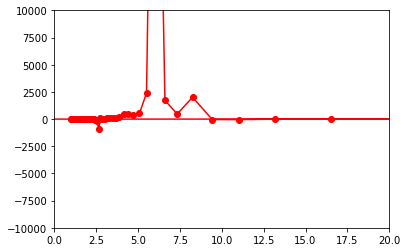

In [46]:
bend_tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(refl)
wl = []
Ts = []

for i in range(nfreq):
    if flux_freqs[i] == 0:
        continue
    wl = np.append(wl, 1/flux_freqs[i])
    Ts = np.append(Ts, bend_tran_flux[i]/straight_tran_flux[i])
    
if mp.am_master():
    plt.figure()
    plt.plot(wl, Ts, 'ro-', label = 'transmittance')
    plt.axis([0, 20.0, -10000, 10000])
    plt.show()